In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data1 = pd.read_csv("DATA_for_visualization/data_v1_for_t-SNE__R50_e3_n2_nd1000.dat", sep = "\t", header = None)
color1 = pd.read_csv("DATA_for_visualization/color_v1_for_t-SNE__R50_e3_n2_nd1000.dat", sep = "\t", header = None)

In [24]:
data1.columns = ["x0", "x1", "x2", "x3", "x4"]
data1['y'] = color1

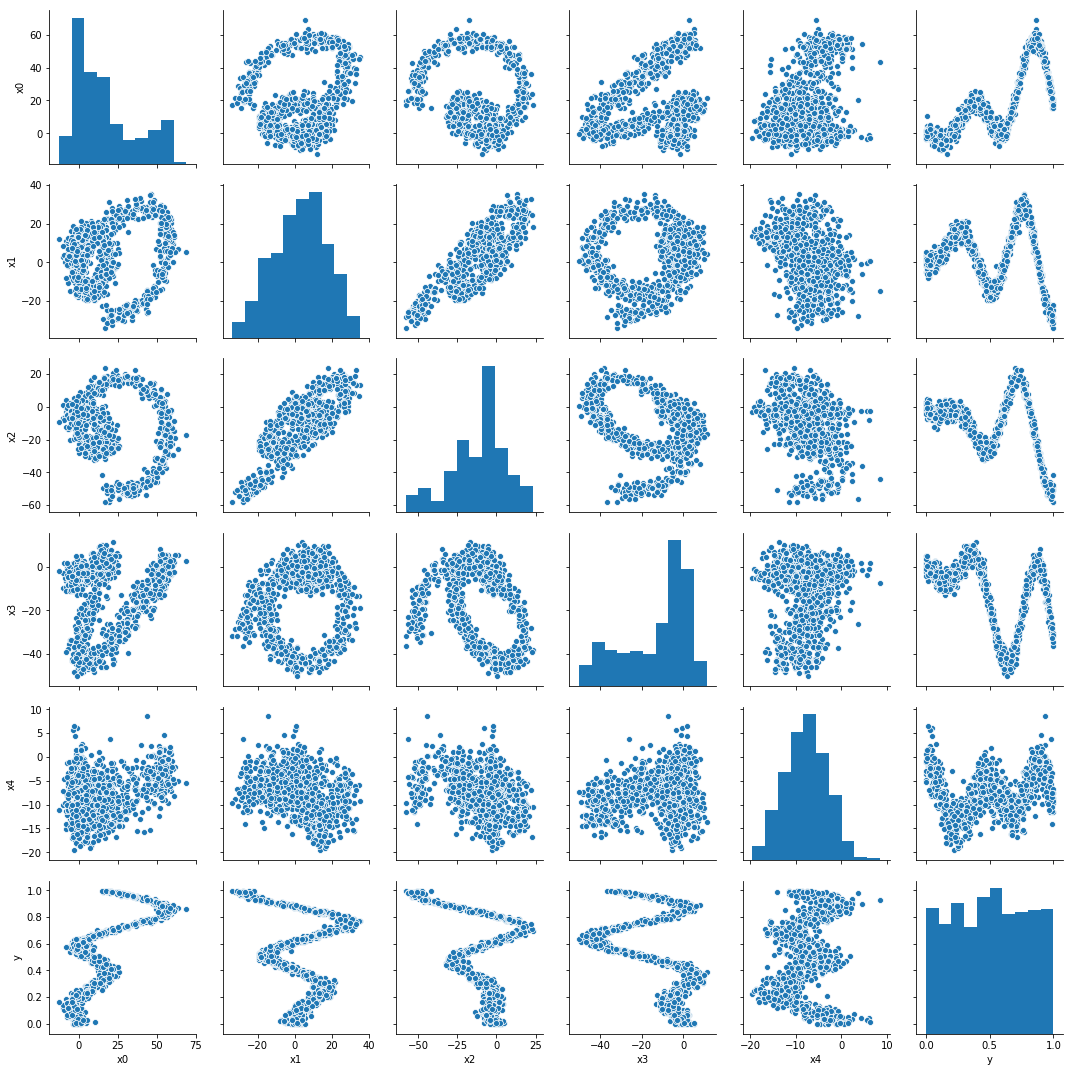

In [25]:
sns.pairplot(data1)
plt.show()

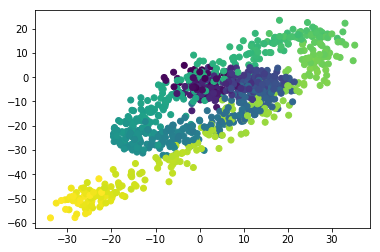

In [30]:
plt.scatter(data1['x1'], data1['x2'], c=data1['y'])

Automatically created module for IPython interactive environment
circles, perplexity=5 in 0.94 sec
circles, perplexity=30 in 1 sec
circles, perplexity=50 in 1.1 sec
circles, perplexity=100 in 1.6 sec


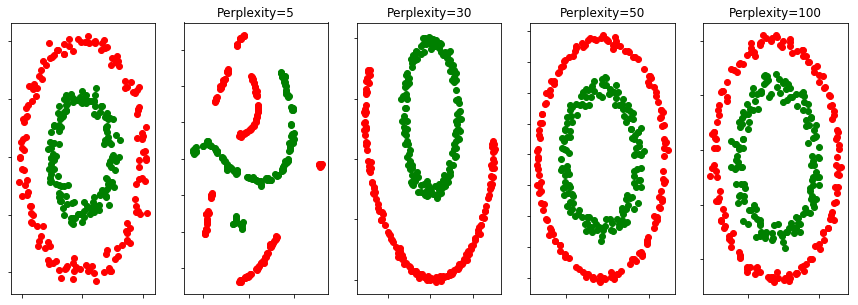

In [28]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 5))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0]

ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random', # <- THIS
                         random_state=0, perplexity=perplexity)    # <- THIS
    Y = tsne.fit_transform(X)                                      # <- AND THIS
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()